# Einstieg

## Abhängigkeiten installieren

In [1]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Aufgabe 1: Aufwärmen mit Numpy und Matplotlib

In [2]:
import numpy as np

A) Lade mit `np.loadtxt()` die Daten in der Datei `01_daten_x.txt` in eine Variable `x` 

In [3]:
x = np.loadtxt("01_daten_x.txt")

B) Wie viele Zeilen und Spalten hat das geladene Array?

In [4]:
x.shape

(100, 3)

C) Wie unterscheidet sich die Verteilung der Werte in der ersten, zweiten und dritten Spalte voneinander? Errechen hierzu den Durchschnitt und die Standardabweichung pro Spalte.

In [5]:
for i in range(x.shape[1]):
    print(f"Durchschnitt Spalte {i}:", np.mean(x[:, i]))
    print(f"Standardabweichung Spalte {i}:", np.std(x[:, i]))

Durchschnitt Spalte 0: -0.16637202172889018
Standardabweichung Spalte 0: 0.8983884592246134
Durchschnitt Spalte 1: -0.09167475925375256
Standardabweichung Spalte 1: 0.9995934031160767
Durchschnitt Spalte 2: 0.003202037340993318
Standardabweichung Spalte 2: 0.29154035170184195


In [6]:
np.mean(x, axis=0)

array([-0.16637202, -0.09167476,  0.00320204])

In [7]:
np.std(x, axis=0)

array([0.89838846, 0.9995934 , 0.29154035])

D) Lade mit `np.loadtxt()` die Daten in der Datei `01_daten_y.txt` in eine Variable `y`

In [8]:
y = np.loadtxt("01_daten_y.txt")

E) Was sind die minimalen und maximalen Werte in `y`?

In [9]:
np.min(y)

-197.53097855381597

In [10]:
np.max(y)

179.02690171399445

F) Erstelle mit `plt.hist()` ein Histogramm der Werte in y

In [11]:
import matplotlib.pyplot as plt

(array([ 2.,  2.,  2.,  1.,  4.,  7.,  6., 11.,  2., 13.,  8.,  7., 13.,
         3.,  4.,  7.,  2.,  3.,  0.,  3.]),
 array([-197.53097855, -178.70308454, -159.87519053, -141.04729651,
        -122.2194025 , -103.39150849,  -84.56361447,  -65.73572046,
         -46.90782645,  -28.07993243,   -9.25203842,    9.57585559,
          28.40374961,   47.23164362,   66.05953763,   84.88743165,
         103.71532566,  122.54321967,  141.37111369,  160.1990077 ,
         179.02690171]),
 <BarContainer object of 20 artists>)

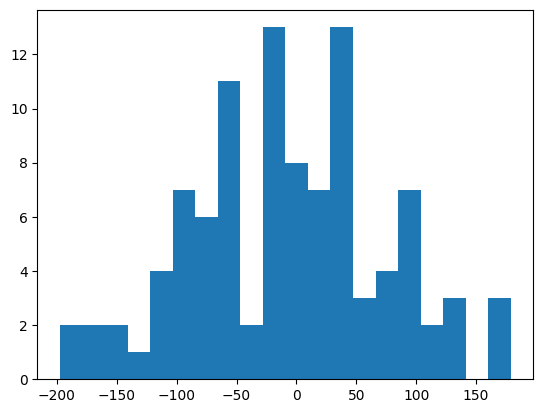

In [12]:
plt.hist(y, bins=20)

G) Wie sind die Werte in den Spalten von `x` mit den Werten in `y` korreliert?

Erstelle hierzu einen Plot mit Legende und Achsenbeschriftungen.

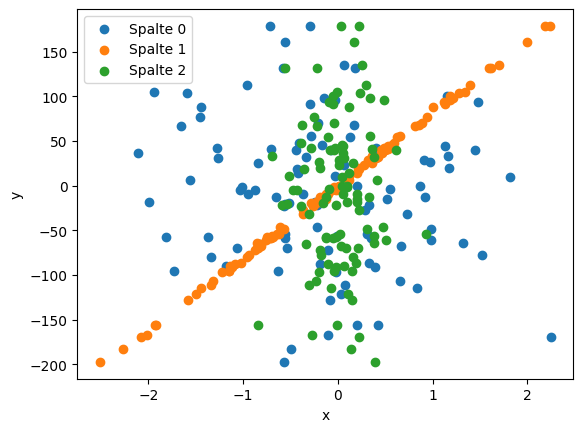

In [13]:
plt.scatter(x[:, 0], y, label="Spalte 0")
plt.scatter(x[:, 1], y, label="Spalte 1")
plt.scatter(x[:, 2], y, label="Spalte 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

## Aufgabe 2: Pandas und ein bisschen Mathematik

In [14]:
import pandas as pd

A) Lade mit `pd.read_json()` den Dataframe aus der Datei `01_dataframe.json` in eine Variable `df`

In [15]:
df = pd.read_json("01_dataframe.json")

B) Wie viele und welche Spalten sind in `df` enthalten? Welche Datentypen haben sie?

In [16]:
len(df.columns)

7

In [17]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')

In [18]:
df.dtypes

A      int64
B    float64
C     object
D    float64
E    float64
F    float64
G    float64
dtype: object

In [19]:
df["A"].mean()

5.04

C) Welche möglichen Werte nimmt die einzige kategorische Variable im Datensatz an?

In [20]:
df.head()

,A,B,C,D,E,F,G
0,2,0.942412,green,0.931665,0.213035,-2.310740,0.000001
1,6,-0.313413,blue,-0.627906,-0.920347,-0.255134,0.031105
2,7,0.254609,red,0.636662,0.909242,0.614581,-0.055766
3,0,0.620063,blue,0.701500,0.806238,-1.235523,-0.000540
4,7,0.889829,red,1.314838,-0.835527,-0.781393,-0.076770


In [21]:
df["C"].unique()

array(['green', 'blue', 'red', 'yellow'], dtype=object)

D) Welcher Zusammenhang besteht zwischen den Werten in Spalte `D` und `E`?

Bonus: Erzeuge aus `D` eine neue Spalte `H`, die identisch zu `E` ist.

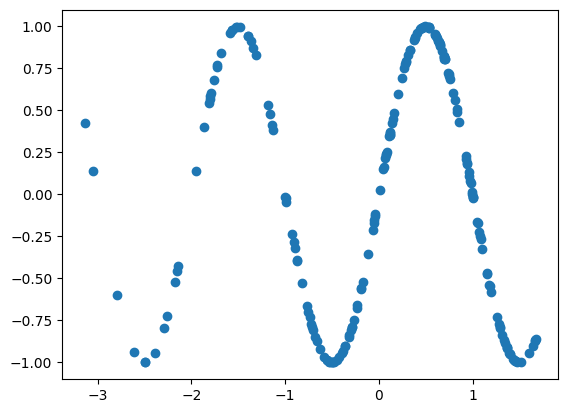

In [22]:
plt.scatter(df["D"], df["E"])
#plt.scatter(df["D"], np.sin(3.14*df["D"]))

E) Die Spalten `B`, `D` und `G` sind ebenfalls miteinander korreliert. Wie?

Erstelle hierzu zunächst eine Figure mit `plt.subplots()`, in der jede der möglichen Kombinationen in einem eigenen Sub-Plot dargestellt wird.

Tipp: Mit `fig.set_figheight()` und `fig.set_figwidth()` kannst du dir den nötigen Platz schaffen.

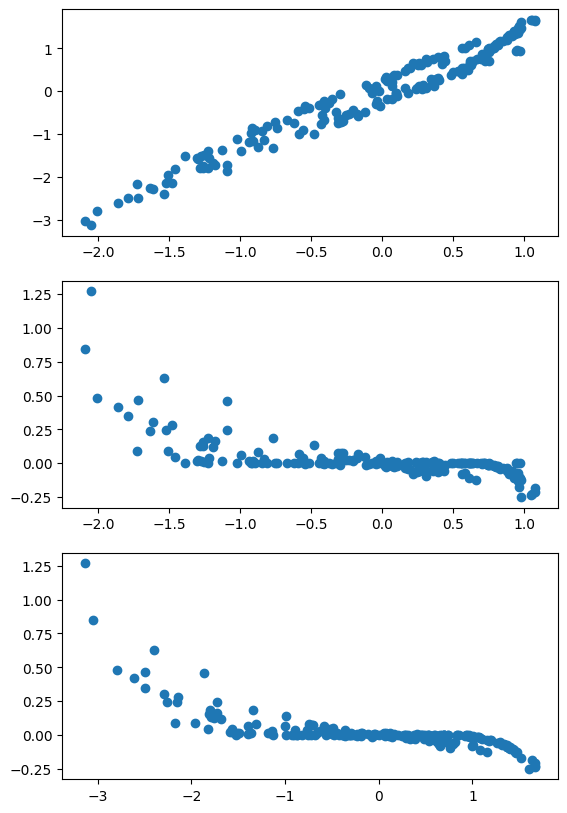

In [23]:
fig, ax = plt.subplots(3)

ax[0].scatter(df["B"], df["D"])
ax[1].scatter(df["B"], df["G"])
ax[2].scatter(df["D"], df["G"])

fig.set_figheight(10)

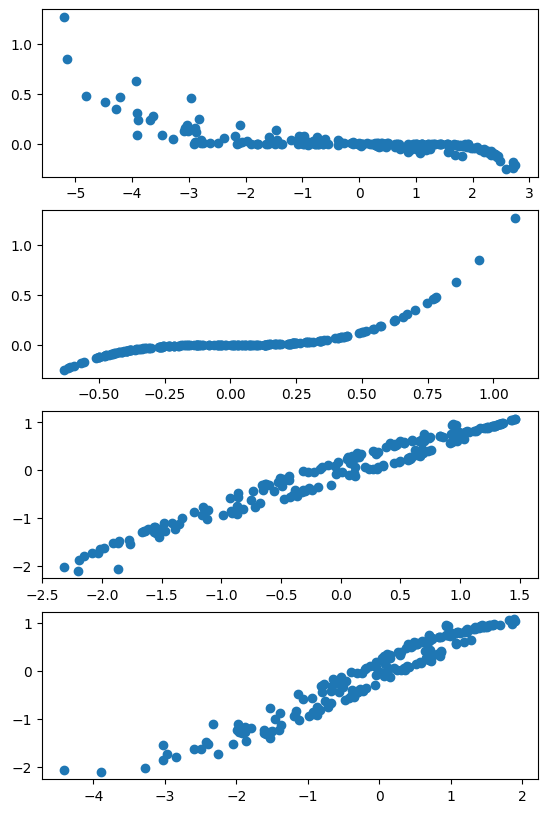

In [24]:
fig, ax = plt.subplots(4)

ax[0].scatter(df["B"] + df["D"], df["G"])
ax[1].scatter(df["B"] - df["D"], df["G"])
#ax[1].scatter(df["B"] - df["D"], (df["B"] - df["D"])**3)
ax[2].scatter(df["D"] + df["G"], df["B"])
ax[3].scatter(df["D"] - df["G"], df["B"])

fig.set_figheight(10)

F) Welcher Zusammenhang besteht zwischen `A` und `C`?

Text(0.5, 0, 'A')

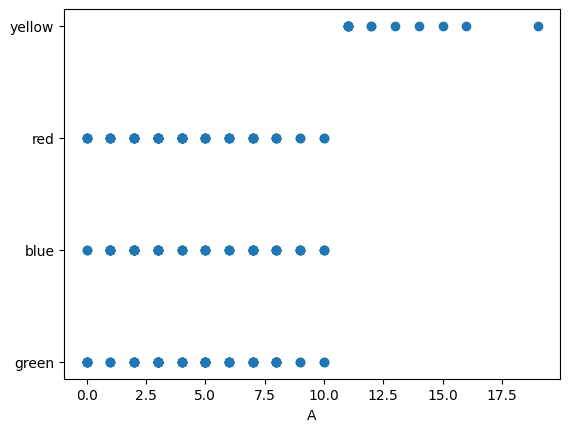

In [25]:
plt.scatter(df["A"], df["C"])
plt.xlabel("A")